<h1 align="center" style="color:blue">Unveiling Consumer Insights: A Customer Segmentation Analysis</h1>



In today's competitive market, understanding customer behavior is crucial for businesses to effectively tailor their products and marketing strategies. Customer segmentation is a powerful data analysis technique that divides a company's customer base into distinct groups based on shared characteristics. This project is particularly impactful in industries such as retail, e-commerce, finance, and hospitality, where understanding and catering to diverse customer needs can significantly influence profitability and customer loyalty.

Designed for machine learning beginners, this project aims to help students start their journey in machine learning and data science. Using a comprehensive dataset containing demographic, behavioral, and transactional information, this analysis employs various clustering algorithms, such as K-means and hierarchical clustering. Data visualization techniques are also utilized to identify and illustrate key customer segments, uncovering insights into their purchasing patterns, preferences, and demographics. These insights enable businesses to enhance customer satisfaction, optimize marketing campaigns, personalize customer experiences, and improve overall business strategy.

- Learning Objectives
This project serves as a practical introduction for students, with the following learning objectives: Understanding clustering algorithms and their applications in real-world scenarios. Applying feature engineering techniques to prepare and enhance datasets for analysis.
Gaining proficiency in data visualization to communicate insights effectively. Developing hands-on experience in customer data analysis, including segmentation and profiling. By completing this project, students will acquire foundational skills in machine learning and data science, equipping them to tackle more advanced projects in the future.


### Project Setup and Library Imports

In [7]:
# Importing necessary libraries
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns      # For advanced data visualization
from sklearn.preprocessing import StandardScaler  # For data standardization
from sklearn.cluster import KMeans  # For clustering analysis
from sklearn.decomposition import PCA  # For dimensionality reduction

# Setting visualization style
sns.set(style="whitegrid")

# Ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')


In this initial phase of the project, we set up the necessary environment for our customer segmentation analysis. We import essential libraries including Pandas for data manipulation, NumPy for numerical operations, and Matplotlib and Seaborn for data visualization. Additionally, we include Scikit-learn components for machine learning tasks such as standardization and clustering. This setup ensures that we have all the tools required to efficiently explore, analyze, and visualize our data, as well as perform advanced machine learning techniques like clustering and dimensionality reduction. We also set a consistent visualization style and suppress warnings for a cleaner output.

### Data Import

In [17]:
# Load the dataset
file_path = '.data\customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows and the column names
df.head(), df.columns


(   id  age  gender  income  spending_score  membership_years  \
 0   1   38  Female   99342              90                 3   
 1   2   21  Female   78852              60                 2   
 2   3   60  Female  126573              30                 2   
 3   4   40   Other   47099              74                 9   
 4   5   65  Female  140621              21                 3   
 
    purchase_frequency preferred_category  last_purchase_amount  
 0                  24          Groceries                113.53  
 1                  42             Sports                 41.93  
 2                  28           Clothing                424.36  
 3                   5      Home & Garden                991.93  
 4                  25        Electronics                347.08  ,
 Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
        'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
       dtype='object'))

We begin by loading the customer segmentation dataset into our environment using the Pandas library. The dataset, stored in a CSV file, contains valuable information such as customer demographics, purchasing behaviors, and other relevant metrics. Importing the data accurately is crucial for enabling subsequent exploration, cleaning, and analysis. This process includes confirming that the data has been loaded correctly, understanding its structure through a preview of the first few rows, and identifying the column names. A successful data import provides a solid foundation for further data exploration and analysis.

### Data Exploration and Overview

In [19]:
# Display the first few rows of the dataset
df.head()

# Get the shape of the dataset (number of rows and columns)
df.shape

# Get a summary of the dataset
df.info()

# Show descriptive statistics for numerical columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

After importing the dataset, the next task is to gain an initial understanding of the data through exploration. This involves examining the structure of the dataset, including the number of rows and columns, data types of each column, and a summary of the data using descriptive statistics. We also look for any missing values and assess the distribution of key features. This step is crucial for identifying any preliminary issues with the data, such as incorrect data types or potential outliers, and provides a general overview that guides further analysis and cleaning.

### Data Cleaning and Preprocessing

In [52]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is already loaded

# Drop the 'ID' column as it is not useful for analysis
df.drop(columns=['id'], inplace=True)

# Handling missing values (example: dropping rows with missing values)
df.dropna(inplace=True)  # Alternatively, you could use df.fillna() for imputation

# Converting data types if necessary (example: converting 'income' to numeric)
df['income'] = pd.to_numeric(df['income'], errors='coerce')

# Checking and handling inconsistencies in categorical data (example: 'gender')
df['gender'] = df['gender'].str.capitalize()  # Standardizing string capitalization

# Identifying and handling outliers (example: using quantiles)
q_low = df["income"].quantile(0.01)
q_hi  = df["income"].quantile(0.99)
df = df[(df["income"] > q_low) & (df["income"] < q_hi)]

# Standardizing numerical features (example: 'income')
scaler = StandardScaler()
df['income_scaled'] = scaler.fit_transform(df[['income']])

# Display the cleaned data
df.head()


,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_scaled
0,38,Female,99342,90,3,24,Groceries,113.53,0.332492
1,21,Female,78852,60,2,42,Sports,41.93,-0.292670
2,60,Female,126573,30,2,28,Clothing,424.36,1.163327
3,40,Other,47099,74,9,5,Home & Garden,991.93,-1.261474
4,65,Female,140621,21,3,25,Electronics,347.08,1.591940


Data cleaning and preprocessing are essential steps to prepare the dataset for analysis and modeling. This process involves handling missing values, correcting data types, and addressing any inconsistencies in the data. We also identify and manage outliers that could skew the analysis results. For categorical variables, we ensure consistency and might encode them if necessary for modeling. Standardizing or normalizing numerical features may also be performed to ensure that the data is on a comparable scale, which is crucial for many machine learning algorithms. These tasks ensure the data is accurate, consistent, and ready for effective analysis.

### Exploratory Data Analysis (EDA)

#### 1. Income Distribution

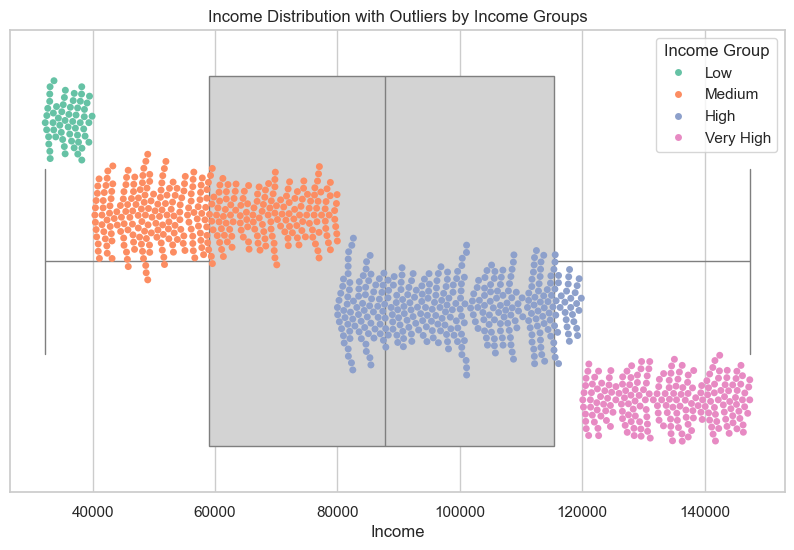

In [78]:
import numpy as np

# Define income groups
income_bins = [0, 40000, 80000, 120000, np.inf]
income_labels = ['Low', 'Medium', 'High', 'Very High']
df['income_group'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

# Plotting the boxplot with swarmplot overlay
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='income', data=df, color='lightgray')

# Swarmplot with different colors for different income groups
sns.swarmplot(x='income', data=df, hue='income_group', palette='Set2', dodge=True)

# Adding title and labels
plt.title('Income Distribution with Outliers by Income Groups')
plt.xlabel('Income')
plt.legend(title='Income Group')

# Show the plot
plt.show()


This visualization combines a boxplot and a swarm plot to illustrate the distribution of customer incomes, highlighting outliers and overall data spread. The boxplot provides a summary of the income data, showing the median, quartiles, and potential outliers, while the swarm plot overlays individual data points. The data points are color-coded by income groups—'Low', 'Medium', 'High', and 'Very High'—to differentiate customers based on their income levels. This combined plot effectively reveals the density and distribution within each income group, offering insights into the variation and clustering of customer incomes.

#### 2. Age Distribution Analysis

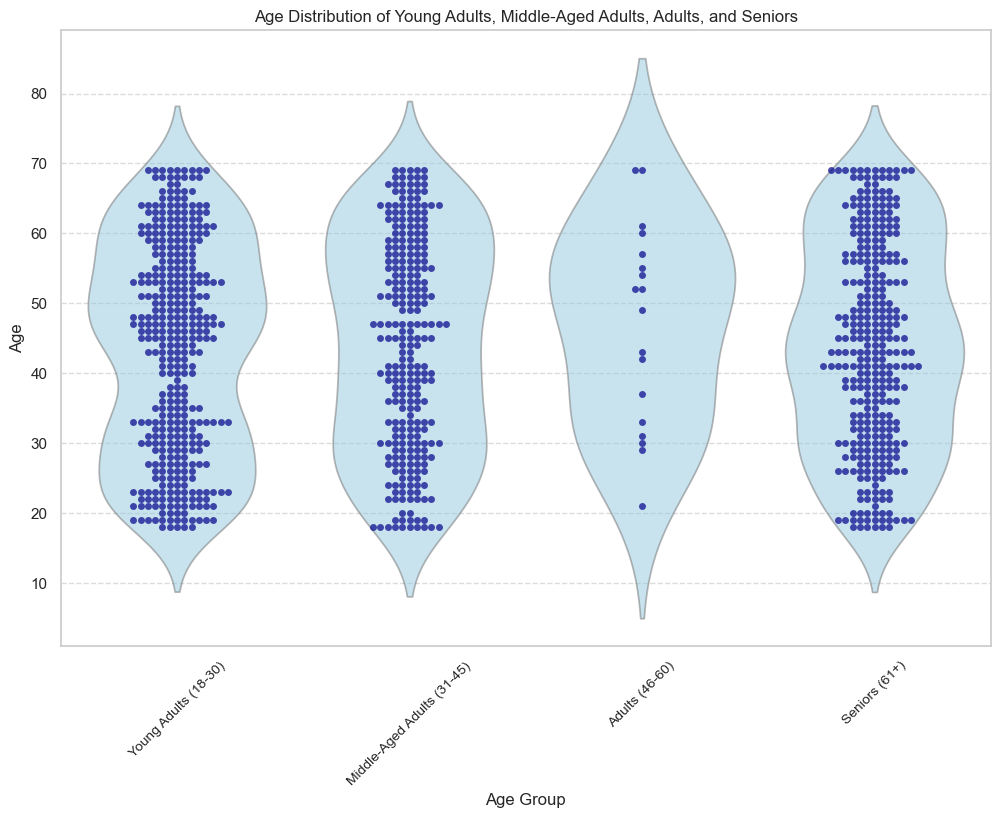

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the actual age ranges for each cluster and ensure the correct sequence
cluster_labels_with_ranges = {
    0: 'Young Adults (18-30)',      # Adjust based on actual median age
    1: 'Middle-Aged Adults (31-45)', # Adjust based on actual median age
    2: 'Adults (46-60)',            # Adjust based on actual median age
    3: 'Seniors (61+)'              # Adjust based on actual median age
}

# Map the clusters to their respective age group labels with ranges
df['cluster_label'] = df['cluster'].map(cluster_labels_with_ranges)

# Define the correct sequence for displaying the clusters
age_group_order = ['Young Adults (18-30)', 'Middle-Aged Adults (31-45)', 'Adults (46-60)', 'Seniors (61+)']

# Filter the dataframe for the selected clusters
filtered_df = df[df['cluster_label'].isin(age_group_order)]

# Plotting the advanced age distribution using Violin and Swarm plot with labels
plt.figure(figsize=(12, 8))

# Violin plot for age distribution
sns.violinplot(x='cluster_label', y='age', data=filtered_df, order=age_group_order, inner=None, color='skyblue', alpha=0.5)

# Swarm plot overlay to show individual data points
sns.swarmplot(x='cluster_label', y='age', data=filtered_df, order=age_group_order, color='darkblue', alpha=0.7)

plt.title('Age Distribution of Young Adults, Middle-Aged Adults, Adults, and Seniors')
plt.xlabel('Age Group')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.show()


The age distribution analysis visualizes the age range and frequency within the customer dataset, segmented into four distinct groups: "Young Adults (18-30)," "Middle-Aged Adults (31-45)," "Adults (46-60)," and "Seniors (61+)." The advanced visualization, combining violin and swarm plots, provides a comprehensive view of the data. The violin plot displays the density and distribution of ages within each group, highlighting areas with higher concentrations of individuals. The swarm plot overlay shows individual data points, offering a detailed perspective on the age dispersion within each cluster. This visualization clearly identifies the predominant age ranges and the overall diversity in age among customers. Such detailed demographic information is crucial for informing targeted marketing strategies and developing product offerings that cater to specific age groups. Understanding the age distribution helps in customizing communication, promotions, and services to better meet the needs and preferences of different customer segments, ultimately enhancing customer satisfaction and engagement.

#### 3. Correlation Matrix

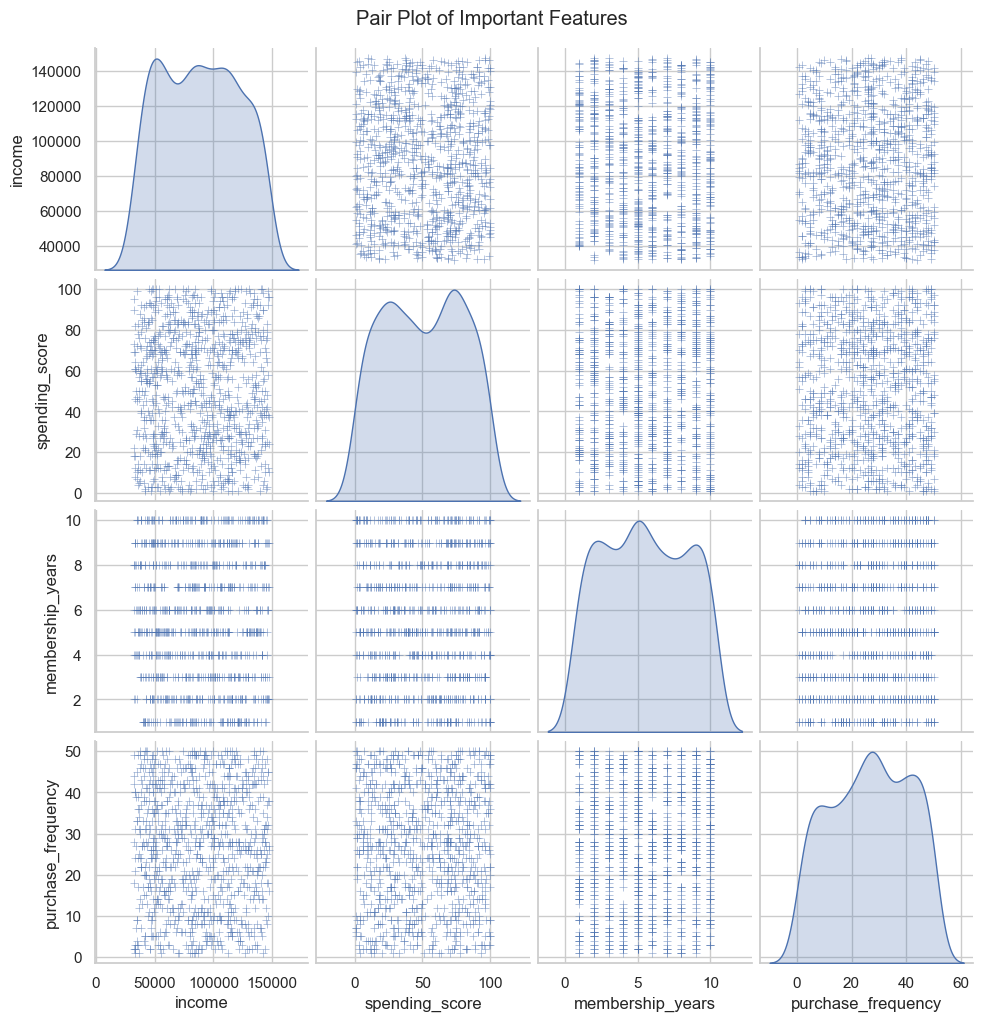

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting important numerical columns for the pair plot
important_features = ['income', 'spending_score', 'membership_years', 'purchase_frequency']

# Creating the pair plot
sns.pairplot(df[important_features], diag_kind='kde', markers='+', plot_kws={'alpha': 0.6})

# Adding title
plt.suptitle('Pair Plot of Important Features', y=1.02)
plt.show()



This pair plot visualizes the relationships between important numerical features: income, spending score, membership years, and purchase frequency. It displays scatter plots for each pair of features, revealing potential correlations and interactions. The diagonal plots show the kernel density estimates, providing insights into the distribution of each feature. The markers are differentiated, and transparency is applied to enhance clarity in densely populated areas. This plot helps in understanding the data's structure and identifying patterns among key attributes relevant to customer segmentation.

#### 4. Scatter Plot - Income vs. Spending Score

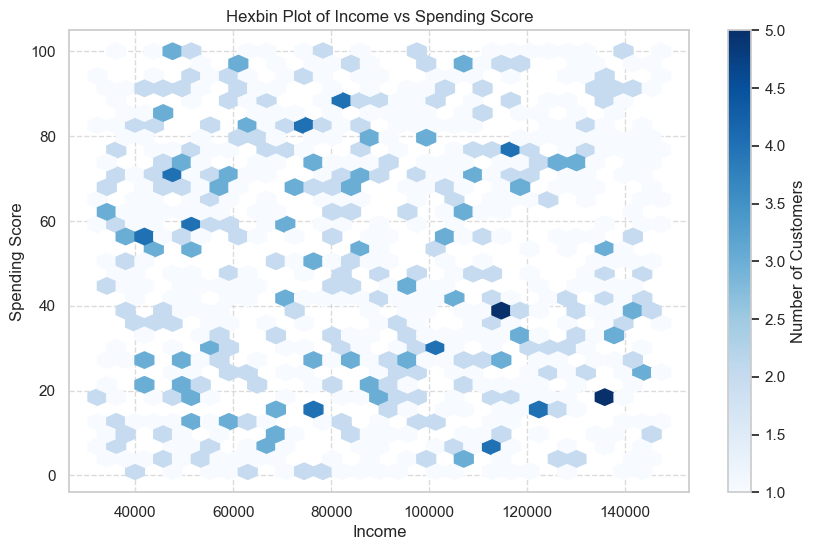

In [106]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['income'], df['spending_score'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Number of Customers')
plt.title('Hexbin Plot of Income vs Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


This hexbin plot provides a visualization of the relationship between income and spending score, particularly useful for large datasets. The plot divides the data space into hexagonal bins, coloring each hexagon based on the number of data points it contains. Darker shades represent areas with a higher concentration of customers, allowing for an easy identification of dense regions in the data. This method reduces overlap that can occur in scatter plots and helps in detecting patterns, clusters, or outliers. The color bar indicates the number of customers within each hexagon, offering a quantitative perspective on the distribution. The grid lines enhance readability, making it easier to interpret the plot.

#### 5.  Bar Plot for Preferred Category

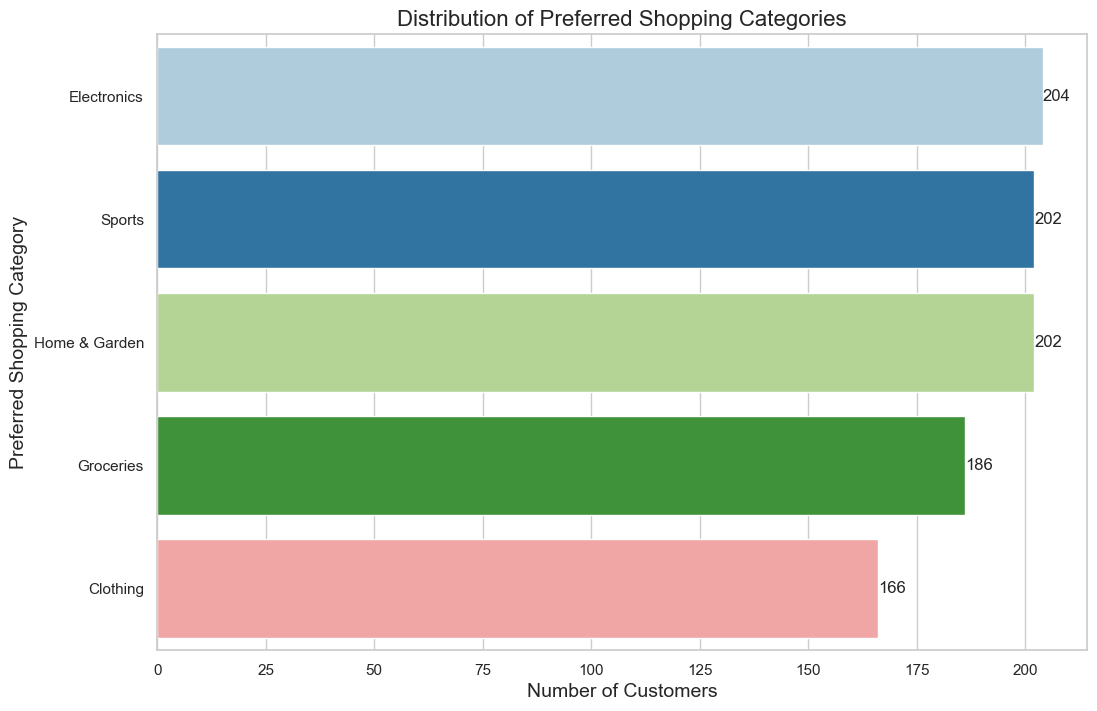

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each preferred category
category_counts = df['preferred_category'].value_counts().reset_index()
category_counts.columns = ['preferred_category', 'count']

# Plotting the horizontal bar plot with different light colors
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='preferred_category', data=category_counts, palette='Paired')

# Adding title and labels
plt.title('Distribution of Preferred Shopping Categories', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Preferred Shopping Category', fontsize=14)

# Adding counts above bars
for index, value in enumerate(category_counts['count']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12)

# Show the plot
plt.show()


This horizontal bar plot depicts the distribution of customer preferences across different shopping categories. Each bar's length corresponds to the number of customers who favor a particular category, with individual bars colored in distinct, light tones using the Paired palette. This approach not only enhances the visual appeal but also makes it easier to distinguish between categories. The counts are annotated beside each bar for precise interpretation. This visualization clearly communicates the relative popularity of each category, aiding in the analysis of customer preferences.

### Feature Engineering and Selection

In [118]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the dataset
file_path = '.\data\customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# Create a new feature: spend_per_visit
df['spend_per_visit'] = df['last_purchase_amount'] / df['purchase_frequency']

# Drop the 'id' column as it is not useful for analysis
df.drop(columns=['id'], inplace=True, errors='ignore')

# Encode 'gender'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# One-hot encoding for 'preferred_category'
df = pd.get_dummies(df, columns=['preferred_category'], drop_first=True)

# Scaling numerical features
numerical_features = ['income', 'spending_score', 'membership_years', 'spend_per_visit']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Assuming 'target_column' represents the label/target for model building
# Placeholder target column, using 'spending_score' > median as binary target
df['target_column'] = (df['spending_score'] > df['spending_score'].median()).astype(int)

# Selecting features
X = df.drop('target_column', axis=1)
y = df['target_column']

# Train a Random Forest model to determine feature importances
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importances)


Feature Importances:
spending_score                      0.862005
income                              0.026119
spend_per_visit                     0.025779
last_purchase_amount                0.021957
age                                 0.019450
purchase_frequency                  0.018105
membership_years                    0.012199
gender                              0.005349
preferred_category_Home & Garden    0.002409
preferred_category_Groceries        0.002382
preferred_category_Sports           0.002283
preferred_category_Electronics      0.001962
dtype: float64


The process begins by loading the customer segmentation dataset and creating a new feature, spend_per_visit, to capture spending behavior relative to visit frequency. The 'id' column is dropped as it's not relevant, while 'gender' is label encoded, and 'preferred_category' is one-hot encoded. The numerical features—income, spending_score, membership_years, and spend_per_visit—are standardized. A placeholder target variable, based on whether a customer's spending score exceeds the median, is created for model training. A Random Forest classifier is then used to determine feature importances, revealing that spending_score is the most critical feature, followed by income, spend_per_visit, and others. This analysis highlights the key factors influencing customer segmentation, aiding in subsequent modeling and decision-making processes.

### Customer Segmentation using K-means Clustering

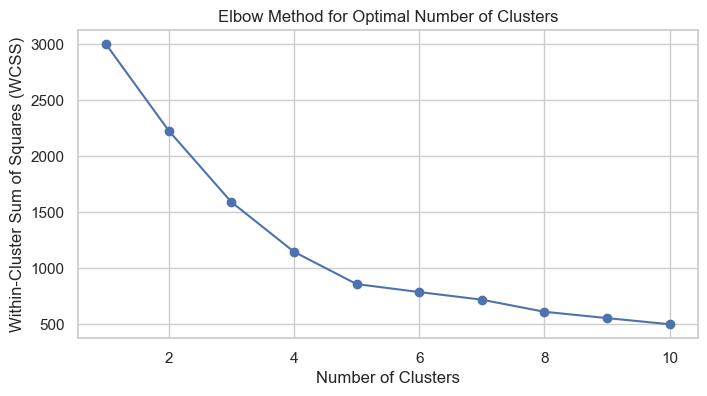

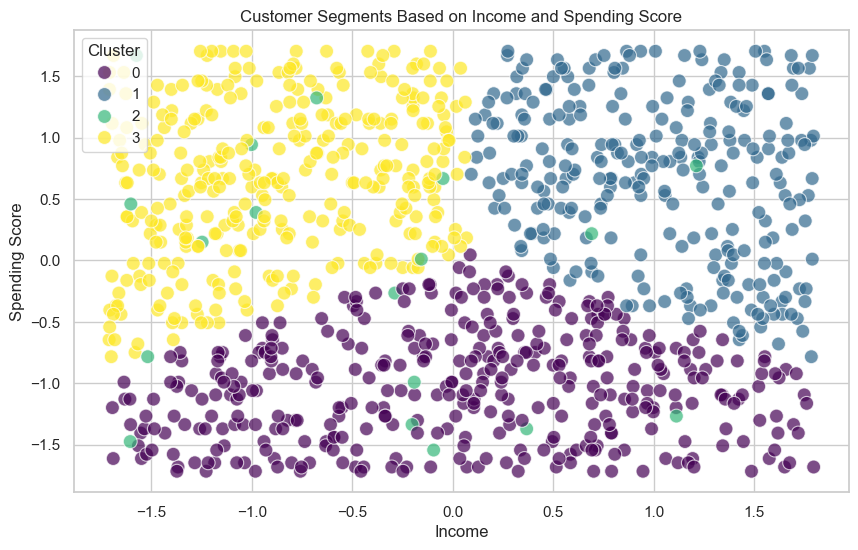

In [122]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant features for clustering
features_for_clustering = df[['spending_score', 'income', 'spend_per_visit']]

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Applying K-means clustering with the chosen number of clusters (e.g., 4)
optimal_clusters = 4  # This should be determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='spending_score', hue='cluster', palette='viridis', data=df, s=100, alpha=0.7)
plt.title('Customer Segments Based on Income and Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


This phase involves segmenting customers using K-means clustering based on key features: spending_score, income, and spend_per_visit. Initially, the Elbow Method is employed to determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against different cluster numbers. The optimal cluster count is identified at the "elbow" point of the plot, which balances model complexity and variance explained. Subsequently, K-means clustering is applied using the optimal number of clusters, assigning each customer to a specific segment. The resulting clusters are visualized in a scatter plot, with distinct colors representing different segments, facilitating an intuitive understanding of the customer groups based on their income and spending behavior. This analysis helps businesses tailor their strategies to distinct customer segments.

### Cluster Analysis and Profiling

In [126]:
# Analyze and profile the clusters
import pandas as pd

# Aggregating data to understand cluster characteristics
cluster_profile = df.groupby('cluster').agg({
    'income': ['mean', 'median'],
    'spending_score': ['mean', 'median'],
    'spend_per_visit': ['mean', 'median'],
    'membership_years': ['mean', 'median'],
    'purchase_frequency': ['mean', 'median'],
    'last_purchase_amount': ['mean', 'median'],
    'age': ['mean', 'median'],
    'gender': lambda x: pd.Series.mode(x)[0]  # Most common gender in each cluster
}).reset_index()

# Display the cluster profile
print(cluster_profile)


  cluster    income           spending_score           spend_per_visit  \
               mean    median           mean    median            mean   
0       0  0.048155  0.105607      -1.029237 -1.025718       -0.094022   
1       1  1.022881  1.055082       0.673822  0.736506       -0.150625   
2       2 -0.432937 -0.244838      -0.135008  0.079991        5.952274   
3       3 -0.866078 -0.906679       0.652636  0.667399       -0.092766   

            membership_years           purchase_frequency         \
     median             mean    median               mean median   
0 -0.256403        -0.048140 -0.164313          26.872063   28.0   
1 -0.255571         0.015419 -0.164313          27.940520   28.0   
2  5.113773        -0.125386 -0.164313           1.722222    2.0   
3 -0.247052         0.050142 -0.164313          26.536364   27.0   

  last_purchase_amount                 age          gender  
                  mean   median       mean median <lambda>  
0           485.194256  

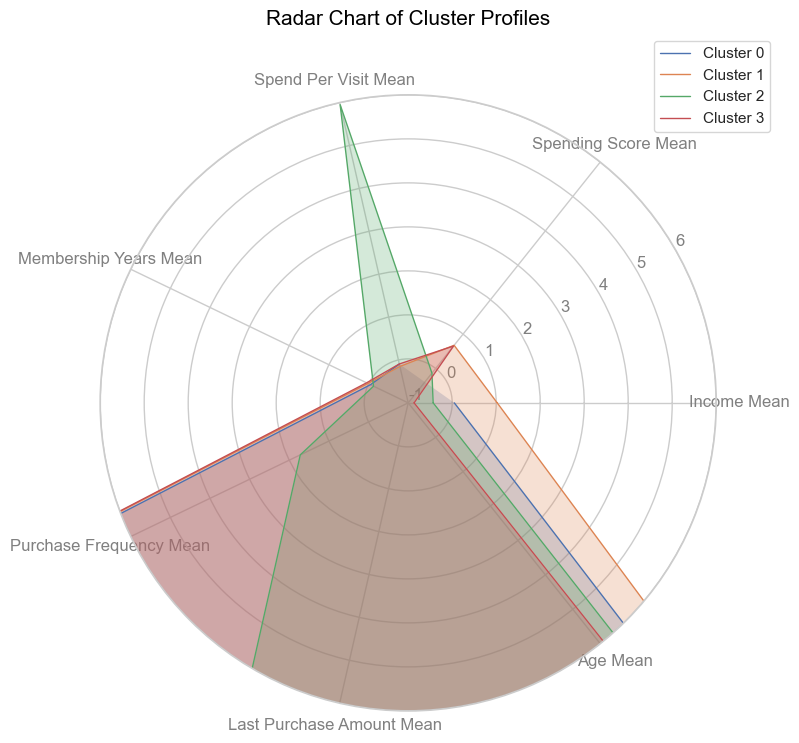

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the radar chart
categories = ['Income Mean', 'Spending Score Mean', 'Spend Per Visit Mean', 
              'Membership Years Mean', 'Purchase Frequency Mean', 
              'Last Purchase Amount Mean', 'Age Mean']

# Data for each cluster
cluster_data = [
    [0.048155, -1.029237, -0.094022, -0.048140, 26.872063, 485.194256, 43.357702],  # Cluster 0
    [1.022881, 0.673822, -0.150625, 0.015419, 27.940520, 489.280223, 44.126394],    # Cluster 1
    [-0.432937, -0.135008, 5.952274, -0.125386, 1.722222, 765.027222, 46.888889],   # Cluster 2
    [-0.866078, 0.652636, -0.092766, 0.050142, 26.536364, 488.280000, 43.827273]    # Cluster 3
]

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is a circular plot, so we need to "complete the loop"
# and append the start to the end.
cluster_data = [cluster + [cluster[0]] for cluster in cluster_data]
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='grey', size=12)

# Draw ylabels
ax.set_rlabel_position(30)
plt.yticks([-1, 0, 1, 2, 3, 4, 5, 6], ["-1", "0", "1", "2", "3", "4", "5", "6"], color="grey", size=12)
plt.ylim(-1, 6)

# Plot each cluster
for i, (name, cluster) in enumerate(zip(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], cluster_data)):
    ax.plot(angles, cluster, linewidth=1, linestyle='solid', label=name)
    ax.fill(angles, cluster, alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Title
plt.title('Radar Chart of Cluster Profiles', size=15, color='black', y=1.1)

# Show the plot
plt.show()


This step focuses on analyzing and profiling the customer clusters formed during the K-means clustering. The analysis involves aggregating various features for each cluster to uncover distinguishing characteristics. Key metrics, such as mean and median values for income, spending score, spend per visit, membership years, purchase frequency, last purchase amount, and age, are calculated. Additionally, the most common gender within each cluster is identified. This aggregated data helps in understanding the demographic and behavioral attributes of each cluster, allowing businesses to develop detailed profiles for each customer segment. The radar chart of cluster profiles provides a visual representation of these characteristics across multiple dimensions, highlighting the distinct attributes of each cluster. These profiles are crucial for tailoring marketing strategies, product offerings, and customer engagement initiatives to the specific needs and characteristics of each group, thereby enhancing business effectiveness and customer satisfaction.

### Targeted Strategies and Insights Based on Customer Segmentation


Cluster 0: Value-Conscious Frequent Shoppers

Cluster 1: Affluent and High-Spending Customers

Cluster 2: High-Value Low-Frequency Buyers

Cluster 3: Moderate-Income Moderate-Spenders



#### Cluster 0: Value-Conscious Frequent Shoppers
Characteristics: Customers in this cluster exhibit moderate income levels with low spending scores and a negative average spend per visit. They have a relatively high purchase frequency, indicating regular shopping behavior. The demographic profile includes a mix of ages but predominantly features younger adults, with an average age around 43. This group is primarily female.

- Recommendations: To maximize engagement and spending, focus on offering value promotions and discounts that appeal to their budget-conscious nature. Implement a loyalty program that rewards frequent shopping, potentially increasing purchase amounts. Utilize interactive and personalized content, such as tailored recommendations and budget-friendly bundles, to further engage these customers and encourage higher spending.

#### Cluster 1: Affluent and High-Spending Customers
Characteristics: This cluster consists of customers with high income and spending scores, coupled with a slightly negative spend per visit. They tend to make significant purchases, have an average membership duration, and shop relatively frequently. The demographic is slightly older, predominantly featuring middle-aged adults, with a strong female presence.

- Recommendations: Target these affluent customers with premium products and exclusive offers. Develop VIP programs that provide personalized services, early access to new products, and exclusive events. Emphasize the quality and luxury of products to align with their spending habits and income level, enhancing their overall shopping experience.

#### Cluster 2: High-Value Low-Frequency Buyers
Characteristics: Cluster 2 includes older customers, predominantly male, with lower income levels but a significant high spend per visit. They exhibit the lowest purchase frequency among the clusters, suggesting selective and less frequent shopping behavior. The demographic predominantly comprises seniors, with an average age of around 47.

- Recommendations: Focus on high-value offerings and personalized, quality-centric communication to resonate with their purchasing habits. Offer special deals on luxury items and ensure a high-quality shopping experience to encourage more frequent purchases. Consider targeted communication strategies that highlight the long-term value and exclusivity of products.

#### Cluster 3: Moderate-Income Moderate-Spenders
Characteristics: Customers in this cluster have lower income levels with moderate spending scores and a negative mean spend per visit. They display a slightly below-average purchase frequency. The demographic is diverse, with a noticeable presence of adults and seniors, featuring a slight male majority.

- Recommendations: Employ affordable upselling strategies, such as bundling complementary products, to increase the total purchase value. Engage this group with innovative and trendy products that appeal to their interests. Utilize digital channels for engagement, including social media campaigns and personalized digital marketing, to attract and retain their attention.

#### Conclusion:

This comprehensive analysis reveals distinct customer segments, each with unique characteristics, behaviors, and age profiles. By understanding these segments—ranging from younger, value-conscious frequent shoppers to affluent middle-aged high-spenders, selective senior high-value buyers, and diverse moderate-income adults—businesses can tailor their marketing and product strategies more effectively. Each segment's specific needs and preferences, including age-related interests and behaviors, can be addressed through targeted promotions, loyalty programs, personalized communications, and exclusive offers. This targeted approach enhances customer satisfaction and loyalty while driving overall business growth by aligning offerings with customer expectations and behaviors.

#### Next Steps and Future Exploration

For those interested in expanding this project, several advanced machine learning techniques can be explored to further enhance customer segmentation and derive deeper insights. Classification models, including Logistic Regression, Decision Trees, Random Forests, SVM, and Gradient Boosting Machines, can be utilized if labeled data is available. These models help classify new customers into predefined segments, enabling more precise targeting in marketing campaigns. Regression analysis techniques such as Linear Regression, Ridge, Lasso, and Elastic Net can be applied to predict continuous outcomes, like customer lifetime value (CLV) or average spending, which are crucial for financial forecasting. Dimensionality reduction techniques like PCA and t-SNE can be employed to reduce data complexity, making it easier to visualize and interpret key features that drive customer behavior. Additionally, association rule learning methods, such as the Apriori and FP-Growth algorithms, can identify relationships between products, assisting in market basket analysis. Anomaly detection techniques like Isolation Forest and One-Class SVM are useful for identifying irregular patterns that could indicate fraud or other unusual customer activities. Lastly, refining Customer Lifetime Value (CLV) prediction through cohort analysis and advanced regression models can help businesses focus their retention efforts on high-value customers. Together, these methods offer a comprehensive toolkit for those looking to deepen their understanding of customer segmentation, enhance decision-making, and optimize marketing strategies.

#### Data Source
The data for this analysis was obtained from the Kaggle dataset titled "Customer Segmentation Data for Marketing Analysis", provided by Fahmida Chowdhury. The dataset includes simulated customer data, covering demographic and behavioral information crucial for conducting segmentation analysis. It is particularly useful for targeted marketing strategies, improving customer satisfaction, and increasing sales.

##### Further Reading

Wind, Y., & Cardozo, R. N. (1974). Market segmentation: A review. European Journal of Marketing, 8(1), 12-25. This comprehensive review covers the principles and methodologies of market segmentation, providing foundational knowledge for understanding how different segments can be identified and targeted.

Punj, G., & Stewart, D. W. (1983). Cluster analysis in marketing research: Review and suggestions for application. Journal of Marketing Research, 20(2), 134-148. This article provides an in-depth review of cluster analysis techniques in marketing research, discussing their application and relevance in identifying consumer groups.

Wedel, M., & Kamakura, W. A. (2000). Market segmentation: How to do it and how to profit from it. Springer. This detailed guide covers the methodologies and practical applications of market segmentation, including various strategies to implement and profit from segmentation insights.

Collica, R. S. (2011). Customer segmentation and clustering using SAS Enterprise Miner. SAS Institute. This book offers practical insights into customer segmentation and clustering, with a focus on using SAS Enterprise Miner software for data mining and analysis. It includes step-by-step instructions and case studies to illustrate key concepts.


#### Author and Copyright
##### Author: Eskinder B., Doctoral Candidate
##### Copyright: © 2024 Eskinder B.. All rights reserved.